In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

In [3]:
ram_price = pd.read_csv('ram_price.csv')

In [6]:
ram_price[:5]

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


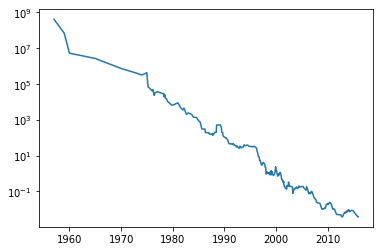

In [7]:
plt.semilogy(ram_price.date, ram_price.price)

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [10]:
data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]

In [29]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

<ipython-input-29-35d343e2bb5d>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]


In [30]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linreg = LinearRegression().fit(X_train, y_train)

In [31]:
X_all = ram_price.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linreg.predict(X_all)

<ipython-input-31-c3d0ceacf471>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_price.date[:, np.newaxis]


In [32]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

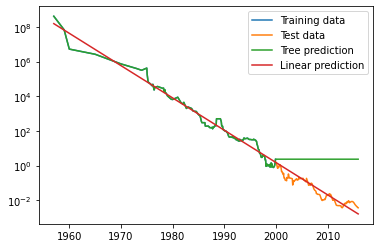

In [21]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_price.date, price_tree, label="Tree prediction")
plt.semilogy(ram_price.date, price_lr, label="Linear prediction")
plt.legend()